In [ ]:
import pandas as pd
import numpy as np

data = {'unit_1':[10,20,30,40,500],
        'unit_2':[20,30,np.NaN,50,50],
        'total':[30,50,np.NaN,90,100]}
print(data)

{'unit_1': [10, 20, 30, 40, 500], 'unit_2': [20, 30, nan, 50, 50], 'total': [30, 50, nan, 90, 100]}


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,unit_1,unit_2,total
0,10,20.0,30.0
1,20,30.0,50.0
2,30,NaN,NaN
3,40,50.0,90.0
4,500,50.0,100.0


In [ ]:
column={}
for i in df.columns:
    column[i]=df[i].isnull().any()
print(column)

{'unit_1': False, 'unit_2': True, 'total': True}


In [ ]:
c=avg=0
for i in df['unit_2']:
  if pd.isna(i):
    continue
  else:
    c=c+1
    avg=avg+i
avg=avg/c
print(avg)

37.5


In [ ]:
df['unit_2'].fillna(value=avg,inplace=True)

In [ ]:
df

,unit_1,unit_2,total
0,10,20.0,30.0
1,20,30.0,50.0
2,30,37.5,NaN
3,40,50.0,90.0
4,500,50.0,100.0


In [ ]:
df['total']=df['unit_1']+df['unit_2']

In [ ]:
df

,unit_1,unit_2,total
0,10,20.0,30.0
1,20,30.0,50.0
2,30,37.5,67.5
3,40,50.0,90.0
4,500,50.0,550.0


In [ ]:
df.shape

(5, 3)

In [ ]:
df.dtypes

unit_1      int64
unit_2    float64
total     float64
dtype: object

In [ ]:
df.value_counts()

unit_1  unit_2  total
10      20.0    30.0     1
20      30.0    50.0     1
30      37.5    67.5     1
40      50.0    90.0     1
500     50.0    550.0    1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


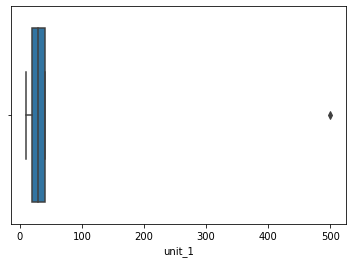

In [ ]:
import seaborn as sns
sns.boxplot(df['unit_1'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

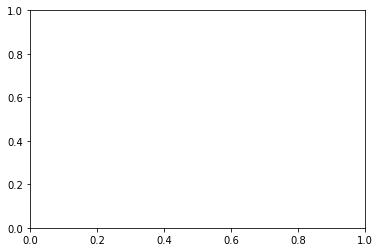

In [ ]:
import seaborn as sns
sns.boxplot(df['unit_1']>50)

In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(df['total']))
z

array([0.64640912, 0.54501161, 0.45628879, 0.34221659, 1.98992611])

In [ ]:
dff=df

In [ ]:
dff=dff[(z<0.71)]
dff

,unit_1,unit_2,total
0,10,20.0,30.0
1,20,30.0,50.0
2,30,37.5,67.5
3,40,50.0,90.0


In [ ]:
df

,unit_1,unit_2,total
0,10,20.0,30.0
1,20,30.0,50.0
2,30,37.5,67.5
3,40,50.0,90.0
4,500,50.0,550.0


In [ ]:
def binn(column,cut_points,labels):
  minn=column.min()
  maxx=column.max()
  break_points=[minn]+cut_points+[maxx]
  print("<60 -> F, 60-70 -> D, 70-80 -> C, 80-90 -> B, 90-100 -> A")
  
  t=pd.cut(column,bins=break_points,labels=labels,include_lowest=True)
  return t

cut_points=[60,70,80,90]
labels=['F','D','C','B','A']
df['Grade']=binn(df['total'],cut_points,labels)

<60 -> F, 60-70 -> D, 70-80 -> C, 80-90 -> B, 90-100 -> A


In [ ]:
df

,unit_1,unit_2,total,Grade
0,10,20.0,30.0,F
1,20,30.0,50.0,F
2,30,37.5,67.5,D
3,40,50.0,90.0,B
4,500,50.0,550.0,A
